In [549]:
import cdflib

import numpy as np
from  datetime import datetime

from viresclient import set_token
from viresclient import SwarmRequest
set_token(
        "https://vires.services/ows",
        set_default=True,
        token="kmxv5mTTyYwzw4kQ9lsCkGfQHtjjJRVZ",
    )  # key


Token saved for https://vires.services/ows


In [550]:
# Replace 'your_file.cdf' with the path to your CDF file
cdf_file_path = 'tracisfolder\SW_OPER_EFICTISH1B_20200329T000000_20200329T235959_0201.cdf'


In [551]:
# Open the CDF file
cdf_data = cdflib.CDF(cdf_file_path)
given_datetime_1_long = datetime(2020, 3, 29, 7, 30, 0)
given_datetime_2_long = datetime(2020, 3, 29, 7, 45, 0)
given_datetime_1_short = datetime(2020, 3, 29, 7, 36, 0)
given_datetime_2_short = datetime(2020, 3, 29, 7, 40, 0)

In [552]:

cdf_info = cdf_data.cdf_info()
print(cdf_info)

CDFInfo(CDF=WindowsPath('C:/Users/1101w/Documents/Programming/Physics_Work/tracisfolder/SW_OPER_EFICTISH1B_20200329T000000_20200329T235959_0201.cdf'), Version='3.8.1', Encoding=6, Majority='Row_major', rVariables=[], zVariables=['Timestamp', 'Latitude', 'Longitude', 'Radius', 'TII_imaging_mode', 'V_MCP_Setting_H', 'V_MCP_Setting_V', 'V_Phos_Setting_H', 'V_Phos_Setting_V', 'V_Bias_Setting_H', 'V_Bias_Setting_V', 'Column_sum_spectrum_H', 'Column_sum_spectrum_V', 'Column_sum_energies_H', 'Column_sum_energies_V'], Attributes=[{'Project': 'Global'}, {'Mission_group': 'Global'}, {'TITLE': 'Global'}, {'PI_name': 'Global'}, {'PI_affiliation': 'Global'}, {'Acknowledgement': 'Global'}, {'Software_version': 'Global'}, {'MODS': 'Global'}, {'File_Name': 'Global'}, {'List_Of_Input_Files': 'Global'}, {'Logical_source_description': 'Global'}, {'Source_name': 'Global'}, {'Data_type': 'Global'}, {'Data_version': 'Global'}, {'Descriptor': 'Global'}, {'Discipline': 'Global'}, {'Generated_by': 'Global'}, {

In [553]:

timestamp_data = cdf_data.varget('Timestamp')
readable_date = cdflib.cdfepoch.to_datetime(timestamp_data)
Spec_H = cdf_data.varget('Column_sum_spectrum_H')
Erg_H = cdf_data.varget('Column_sum_energies_H')
Erg_V = cdf_data.varget('Column_sum_energies_V')
Spec_V = cdf_data.varget('Column_sum_spectrum_V')

In [554]:
readable_date

array(['2020-03-29T00:00:00.000000', '2020-03-29T00:00:00.500000',
       '2020-03-29T00:00:01.000000', ..., '2020-03-29T23:59:59.000000',
       '2020-03-29T23:59:59.500000', '2020-03-30T00:00:00.000000'],
      dtype='datetime64[us]')

In [555]:
print(np.shape(Spec_H))

(172803, 32)


In [556]:
import matplotlib.pyplot as plt

In [557]:
# Given Python datetime objects (replace with actual values)
readable_dates = [dt if isinstance(dt, datetime) else dt.astype(datetime) for dt in readable_date]

# Function to find the closest index
def find_closest_index(datetime_list, target_datetime):
    time_deltas = np.abs(np.array([(dt - target_datetime).total_seconds() for dt in datetime_list]))
    return np.argmin(time_deltas)

# Find the closest indices
closest_index_1 = find_closest_index(readable_dates, given_datetime_1_long)
closest_index_2 = find_closest_index(readable_dates, given_datetime_2_long)

start_index = min(closest_index_1, closest_index_2)
end_index = max(closest_index_1, closest_index_2)
indices_range = np.arange(start_index, end_index + 1)
print(indices_range)

[53994 53995 53996 ... 55792 55793 55794]


In [558]:
readable_dates = np.array(readable_dates)[indices_range]

(1801,) (172803, 32) (1801, 32)


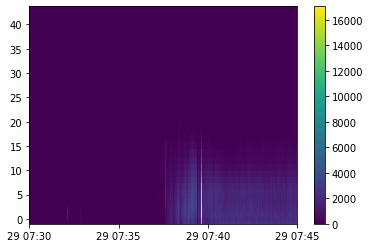

In [559]:
print(np.shape(readable_dates), np.shape(Erg_V), np.shape(Spec_H[indices_range]))
plt.pcolormesh(readable_dates, Erg_V[start_index, :], Spec_V[indices_range].T)
plt.colorbar()

(1801,) (172803, 32) (1801, 32)


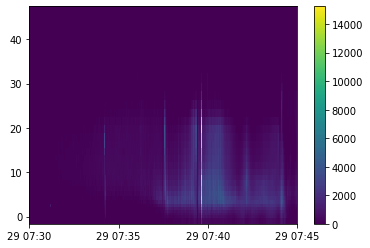

In [560]:
print(np.shape(readable_dates), np.shape(Erg_V), np.shape(Spec_H[indices_range]))
plt.pcolormesh(readable_dates, Erg_H[start_index, :], Spec_H[indices_range].T)
plt.colorbar()

In [561]:
positions_above_5 = np.where(Erg_V[start_index, :] > 5)[0]
positions_below_5 = np.where(Erg_V[start_index, :] < 4)[0]
print(np.shape(Spec_V))

(172803, 32)


(22,)
(22, 1801)


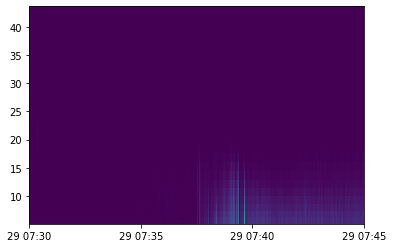

In [562]:
print(np.shape(Erg_V[start_index, positions_above_5]))
print(np.shape(Spec_V[indices_range].T[positions_above_5]))
plt.pcolormesh(readable_dates, Erg_V[start_index, positions_above_5], Spec_V[indices_range].T[positions_above_5])

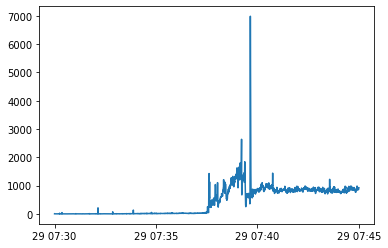

In [563]:
plt.plot(readable_dates, np.mean(Spec_V[indices_range].T, axis=0))

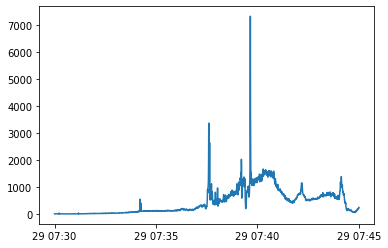

In [564]:
plt.plot(readable_dates, np.mean(Spec_H[indices_range].T, axis=0))

In [565]:
tct_vars = [
    # Satellite velocity in NEC frame
    "VsatC", "VsatE", "VsatN",
    # Geomagnetic field components derived from 1Hz product
    #  (in satellite-track coordinates)
    "Bx", "By", "Bz",
    # Electric field components derived from -VxB with along-track ion drift
    #  (in satellite-track coordinates)
    # Eh: derived from horizontal sensor
    # Ev: derived from vertical sensor
    "Ehx", "Ehy", "Ehz",
    "Evx", "Evy", "Evz",
    # Ion drift corotation signal, removed from ion drift & electric field
    #  (in satellite-track coordinates)
    "Vicrx", "Vicry", "Vicrz",
    # Ion drifts along-track from vertical (..v) and horizontal (..h) TII sensor
    "Vixv", "Vixh",
    # Ion drifts cross-track (y from horizontal sensor, z from vertical sensor)
    #  (in satellite-track coordinates)
    "Viy", "Viz",
    # Random error estimates for the above
    #  (Negative value indicates no estimate available)
    "Vixv_error", "Vixh_error", "Viy_error", "Viz_error",
    # Quasi-dipole magnetic latitude and local time
    #  redundant with VirES auxiliaries, QDLat & MLT
    "Latitude_QD", "MLT_QD",
    # Refer to release notes link above for details:
    "Calibration_flags", "Quality_flags",
]

In [566]:


SERVER_URL = 'https://vires.services/ows'
request = SwarmRequest(SERVER_URL)
request.set_collection("SW_EXPT_EFIA_TCT02")
request.set_products(measurements=tct_vars)
data = request.get_between(given_datetime_1_short, given_datetime_2_short)
df_A = data.as_dataframe()


Processing:  100%|██████████|  [ Elapsed: 00:02, Remaining: 00:00 ] [1/1] 
Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.293MB)


In [567]:

SERVER_URL = 'https://vires.services/ows'
request = SwarmRequest(SERVER_URL)
request.set_collection("SW_EXPT_EFIC_TCT02")
request.set_products(measurements=tct_vars)
data = request.get_between(given_datetime_1_short, given_datetime_2_short)
df_C = data.as_dataframe()

Processing:  100%|██████████|  [ Elapsed: 00:02, Remaining: 00:00 ] [1/1] 
Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.293MB)


In [568]:
print(df_C)

                                Longitude          Viz         Evy  \
Timestamp                                                            
2020-03-29 07:36:00.225250048 -136.365433 -2418.143066 -129.112976   
2020-03-29 07:36:00.725250048 -136.363007  -817.736938 -195.861511   
2020-03-29 07:36:01.225250048 -136.360580   827.236206 -248.067719   
2020-03-29 07:36:01.725250048 -136.358139   318.052277 -221.918549   
2020-03-29 07:36:02.225250048 -136.355698  -462.407898 -321.593048   
...                                   ...          ...         ...   
2020-03-29 07:39:57.725250048 -133.777695  -838.198364  111.919533   
2020-03-29 07:39:58.225250048 -133.766876  -192.439911   96.097816   
2020-03-29 07:39:58.725250048 -133.755997   -75.565155   93.486725   
2020-03-29 07:39:59.225250048 -133.745102  -247.791107   96.857674   
2020-03-29 07:39:59.725250048 -133.734161  -310.083588   94.221207   

                               Quality_flags      Vicrx          Viy  \
Timestamp        

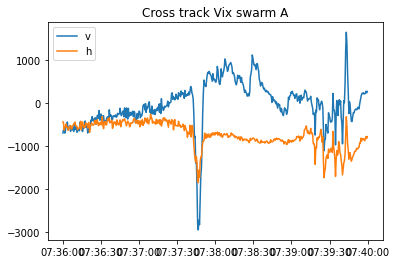

In [569]:
plt.plot(df_A["Vixv"], label='v')
plt.plot(df_A["Vixh"], label='h')
plt.title("Cross track Vix swarm A")
plt.legend()

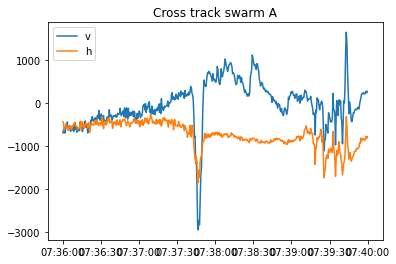

In [570]:
plt.plot(df_A["Vixv"], label='v')
plt.plot(df_A["Vixh"], label='h')
plt.title("Cross track swarm A")
plt.legend()

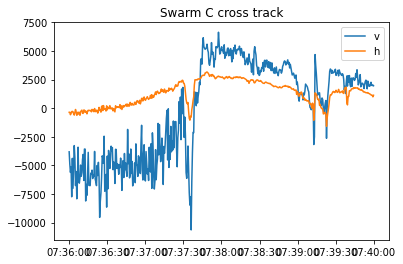

In [571]:
plt.plot(df_C["Vixv"], label='v')
plt.plot(df_C["Vixh"], label='h')
plt.title("Swarm C cross track")
plt.legend()

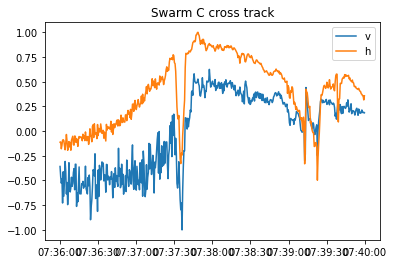

In [572]:
plt.plot(df_C["Vixv"]/max(np.abs(df_C["Vixv"])), label='v')
plt.plot(df_C["Vixh"]/max(np.abs(df_C["Vixh"])), label='h')
plt.title("Swarm C cross track")
plt.legend()

Now the E_x = -( Vi cross B )_x = -(Vi_y B_z - Vi_z B_y) 

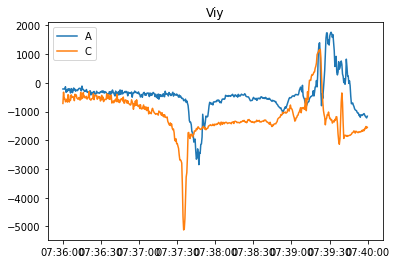

In [573]:
plt.plot(df_A["Viy"], label='A')
plt.plot(df_C["Viy"], label='C')
plt.title("Viy")
plt.legend()

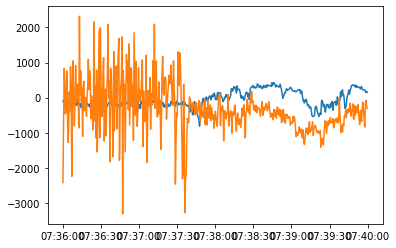

In [574]:
plt.plot(df_A["Viz"], label='A')
plt.plot(df_C["Viz"], label='C')

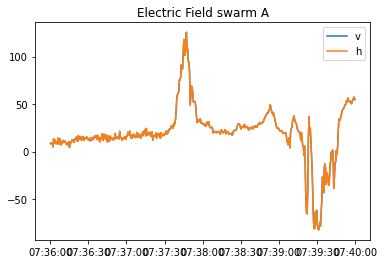

In [575]:
plt.plot(df_A["Ehx"], label='v')
plt.plot(df_A["Evx"], label='h')
plt.title("Electric Field swarm A")
plt.legend()

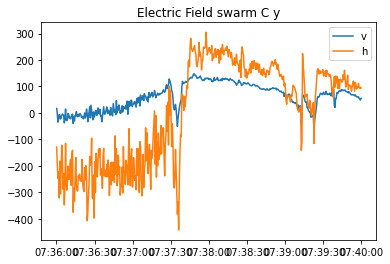

In [576]:
plt.plot(df_C["Ehy"], label='v')
plt.plot(df_C["Evy"], label='h')
plt.title("Electric Field swarm C y")
plt.legend()

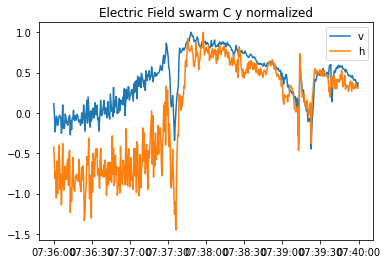

In [577]:
plt.plot(df_C["Ehy"]/max(df_C["Ehy"]), label='v')
plt.plot(df_C["Evy"]/max(df_C["Evy"]), label='h')
plt.title("Electric Field swarm C y normalized")
plt.legend()

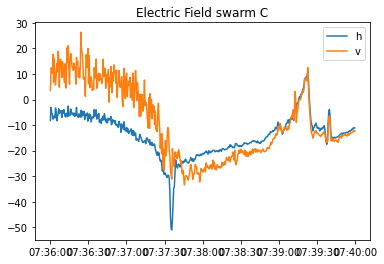

In [578]:
plt.plot(df_C["Ehz"], label='h')
plt.plot(df_C["Evz"], label='v')
plt.title("Electric Field swarm C")
plt.legend()

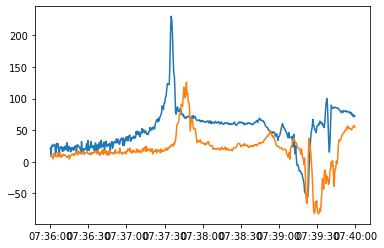

In [579]:
plt.plot(df_C["Evx"], label='h')
plt.plot(df_A["Evx"], label='h')

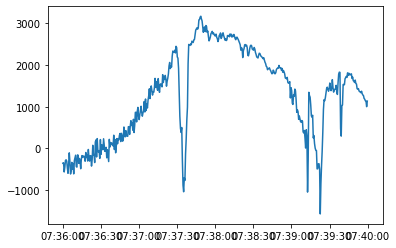

In [580]:
plt.plot(df_C["Vixh"], label='h')

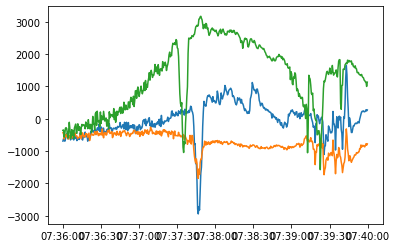

In [581]:
plt.plot(df_A["Vixv"])
plt.plot(df_A["Vixh"])
plt.plot(df_C["Vixh"])

In [582]:
NEC_vecs=np.array(df_A[["VsatN", "VsatE", "VsatC"]])
arraysum = np.sum(np.abs(NEC_vecs), axis=1)
# Normalizes and finds unitary
array_unit = NEC_vecs / arraysum[:, np.newaxis]  # normalizes
print(array_unit[0])

[ 0.9586625   0.03963383 -0.00170362]
